## 02 - Generate CMEMS data cubes 
### A DeepESDL example notebook 

This notebook demonstrates how to access CMEMS data via the dedicated xcube store, which provides dynamic data cube views into each gridded data set. More information on the data sets offered can be found in the [Copernicus Marine Data Store](https://data.marine.copernicus.eu/products). 

Please, also refer to the [DeepESDL documentation](https://deepesdl.readthedocs.io/en/latest/guide/jupyterlab/) and visit the platform's [website](https://www.earthsystemdatalab.net/) for further information!

Brockmann Consult, 2024

-----------------

**This notebook runs with the python environment `deepesdl-xcube-1.5.1`, please checkout the documentation for [help on changing the environment](https://deepesdl.readthedocs.io/en/latest/guide/jupyterlab/#python-environment-selection-of-the-jupyter-kerne).**

If you do not have cmems user yet, you can register for an [account](https://resources.marine.copernicus.eu/registration-form). For DeepESDL Basic Jupyter Profile default credentials are configured, but due to bandwith limitation by CMEMS they might not be performant when used by several people simultanously.

In [1]:
import os

In [2]:
## replace with your user name and pwd
# os.environ["CMEMS_USERNAME"] = "<your-username>"
# os.environ["CMEMS_PASSWORD"] = "<your-pwd>"

In [3]:
# mandatory imports
from IPython.display import JSON
from xcube.core.store import (
    find_data_store_extensions,
    get_data_store_params_schema,
    new_data_store,
)

Check whether the `CMEMS` store is among the available stores, if not please follow the installation information from the top of this notebook. 

In [4]:
JSON({e.name: e.metadata for e in find_data_store_extensions()})

/home/conda/deepesdl/2bd34cd8bababdd70844979892c66d897e94b4aa242ac37093e1ea8dfa679424-20240410-100719-847956-424-xcube-1.5.1/lib/python3.11/site-packages/xcube/util/plugin.py:182: UserWarning: Initializing xcube plugin 'xcube_cmems' took 100 ms, consider code optimization. (For example, avoid eager import of packages, consider lazy loading of resources, etc.)
  warnings.warn(


<IPython.core.display.JSON object>

Usually we need more information to get the actual data store object. Which data store parameters are available for `cmems`?

In [5]:
get_data_store_params_schema("cmems")

------------------------------
#### Import the xcube CMEMS store and create store instance

If you do not have cmems user yet, you can register for an [account](https://resources.marine.copernicus.eu/registration-form). For DeepESDL Basic Jupyter Profile default credentials are configured, but due to bandwith limitation by CMEMS they might not be performant when used by several people simultanously. 

In [6]:
# cmems_store = new_data_store('cmems', cmems_username=os.environ["CMEMS_USERNAME"], cmems_password = os.environ["CMEMS_PASSWORD"])
cmems_store = new_data_store("cmems")

-------------------
#### Get all dataset_ids for CMEMS API and let store describe data set

In [7]:
cmems_store.list_data_ids()

Fetching catalog: 100%|██████████| 3/3 [00:09<00:00,  3.07s/it]


['antarctic_omi_si_extent',
 'antarctic_omi_si_extent_obs',
 'cmems_mod_arc_bgc_anfc_ecosmo_P1D-m',
 'cmems_mod_arc_bgc_anfc_ecosmo_P1M-m',
 'cmems_mod_arc_phy_anfc_6km_detided_P1D-m',
 'cmems_mod_arc_phy_anfc_6km_detided_P1M-m',
 'cmems_mod_arc_phy_anfc_6km_detided_PT1H-i',
 'cmems_mod_arc_phy_anfc_6km_detided_PT6H-m',
 'cmems_mod_arc_phy_anfc_nextsim_P1M-m',
 'cmems_mod_arc_phy_anfc_nextsim_hm',
 'dataset-topaz6-arc-15min-3km-be',
 'dataset-wam-arctic-1hr3km-be',
 'cmems_mod_arc_bgc_my_ecosmo_P1D-m',
 'cmems_mod_arc_bgc_my_ecosmo_P1M',
 'cmems_mod_arc_bgc_my_ecosmo_P1Y',
 'cmems_mod_arc_phy_my_topaz4_P1D-m',
 'cmems_mod_arc_phy_my_topaz4_P1M',
 'cmems_mod_arc_phy_my_topaz4_P1Y',
 'cmems_mod_arc_wav_my_3km-climatology_P1M-m',
 'cmems_mod_arc_wav_my_3km_PT1H-i',
 'arctic_omi_si_transport_nordicseas',
 'arctic_omi_si_extent',
 'arctic_omi_si_extent_obs',
 'arctic_omi_tempsal_fwc',
 'cmems_mod_bal_bgc-pp_anfc_P1D-i',
 'cmems_mod_bal_bgc_anfc_P1D-m',
 'cmems_mod_bal_bgc_anfc_P1M-m',
 'cme

In [8]:
data_des = cmems_store.describe_data("dataset-bal-reanalysis-wav-hourly")

Fetching catalog: 100%|██████████| 3/3 [00:07<00:00,  2.60s/it]

INFO - 2024-04-11T09:30:49Z - Dataset version was not specified, the latest one was selected: "202003"
INFO - 2024-04-11T09:30:49Z - Dataset part was not specified, the first one was selected: "default"


INFO - 2024-04-11T09:30:51Z - Service was not specified, the default one was selected: "arco-geo-series"


/home/conda/deepesdl/2bd34cd8bababdd70844979892c66d897e94b4aa242ac37093e1ea8dfa679424-20240410-100719-847956-424-xcube-1.5.1/lib/python3.11/site-packages/xcube/core/store/descriptor.py:251: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  self.dims = dict(dims) if dims else None


In [9]:
data_des.time_range

('1993-01-01', '2023-07-01')

In [10]:
data_des.bbox

(9, 53, 30.221627251342774, 65.91610912890626)

----------------
#### Open a dataset without cube parameters

In [11]:
ds = cmems_store.open_data("dataset-bal-reanalysis-wav-hourly")
ds

Fetching catalog: 100%|██████████| 3/3 [00:06<00:00,  2.26s/it]

INFO - 2024-04-11T09:31:00Z - Dataset version was not specified, the latest one was selected: "202003"
INFO - 2024-04-11T09:31:00Z - Dataset part was not specified, the first one was selected: "default"


INFO - 2024-04-11T09:31:02Z - Service was not specified, the default one was selected: "arco-geo-series"


<xarray.Dataset> Size: 11TB
Dimensions:    (time: 267312, latitude: 775, longitude: 764)
Coordinates:
  * latitude   (latitude) float32 3kB 53.01 53.02 53.04 ... 65.87 65.89 65.91
  * longitude  (longitude) float32 3kB 9.014 9.042 9.069 ... 30.15 30.18 30.21
  * time       (time) datetime64[ns] 2MB 1993-01-01T01:00:00 ... 2023-07-01
Data variables: (12/17)
    VHM0       (time, latitude, longitude) float32 633GB ...
    VHM0_SW1   (time, latitude, longitude) float32 633GB ...
    VHM0_SW2   (time, latitude, longitude) float32 633GB ...
    VHM0_WW    (time, latitude, longitude) float32 633GB ...
    VMDR       (time, latitude, longitude) float32 633GB ...
    VMDR_SW1   (time, latitude, longitude) float32 633GB ...
    ...         ...
    VTM01_SW1  (time, latitude, longitude) float32 633GB ...
    VTM01_SW2  (time, latitude, longitude) float32 633GB ...
    VTM01_WW   (time, latitude, longitude) float32 633GB ...
    VTM02      (time, latitude, longitude) float32 633GB ...
    VTM10      (time, latitude, longitude) float32 633GB ...
    VTPK       (time, latitude, longitude) float32 633GB ...
Attributes:
    Conventions:            CF-1.0
    cmems_product_id:       BALTICSEA_REANALYSIS_WAV_003_015
    easternmost_longitude:  30.2080
    grid_resolution:        1 nautical mile (ie. 0.0167 degrees northward; 0....
    institution:            Baltic MFC, PU Finnish Meteorological Institute
    northernmost_latitude:  65.9081
    source:                 FMI-WAM_CMEMS
    southernmost_latitude:  53.0083
    title:                  CMEMS WAM hindcast (hourly)
    westernmost_longitude:  9.0138

In [12]:
ds.VHM0

<xarray.DataArray 'VHM0' (time: 267312, latitude: 775, longitude: 764)> Size: 633GB
[158275435200 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float32 3kB 53.01 53.02 53.04 ... 65.87 65.89 65.91
  * longitude  (longitude) float32 3kB 9.014 9.042 9.069 ... 30.15 30.18 30.21
  * time       (time) datetime64[ns] 2MB 1993-01-01T01:00:00 ... 2023-07-01
Attributes:
    long_name:      Spectral significant wave height (Hm0)
    standard_name:  sea_surface_wave_significant_height
    units:          m
    valid_max:      20.0
    valid_min:      0.0

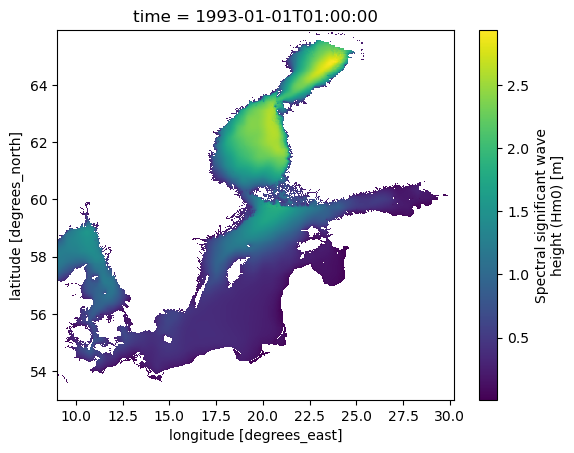

In [13]:
ds.VHM0.isel(time=0).plot.imshow()

--------------------------
#### Open a dataset with cube parameters

In [14]:
cmems_store.get_open_data_params_schema(
    "dataset-bal-reanalysis-wav-hourly"
)

In [15]:
ds = cmems_store.open_data(
    "dataset-bal-reanalysis-wav-hourly",
    variable_names=["VHM0"],
    time_range=("2021-11-01", "2021-12-13"),
    bbox=[10, 54, 20, 62]
)
ds

Fetching catalog: 100%|██████████| 3/3 [00:08<00:00,  2.83s/it]

INFO - 2024-04-11T09:31:14Z - Dataset version was not specified, the latest one was selected: "202003"
INFO - 2024-04-11T09:31:14Z - Dataset part was not specified, the first one was selected: "default"


INFO - 2024-04-11T09:31:15Z - Service was not specified, the default one was selected: "arco-geo-series"


<xarray.Dataset> Size: 697MB
Dimensions:    (time: 1009, latitude: 480, longitude: 360)
Coordinates:
  * latitude   (latitude) float32 2kB 54.01 54.02 54.04 ... 61.96 61.97 61.99
  * longitude  (longitude) float32 1kB 10.01 10.04 10.07 ... 19.93 19.96 19.99
  * time       (time) datetime64[ns] 8kB 2021-11-01 ... 2021-12-13
Data variables:
    VHM0       (time, latitude, longitude) float32 697MB ...
Attributes:
    Conventions:            CF-1.0
    cmems_product_id:       BALTICSEA_REANALYSIS_WAV_003_015
    easternmost_longitude:  30.2080
    grid_resolution:        1 nautical mile (ie. 0.0167 degrees northward; 0....
    institution:            Baltic MFC, PU Finnish Meteorological Institute
    northernmost_latitude:  65.9081
    source:                 FMI-WAM_CMEMS
    southernmost_latitude:  53.0083
    title:                  CMEMS WAM hindcast (hourly)
    westernmost_longitude:  9.0138

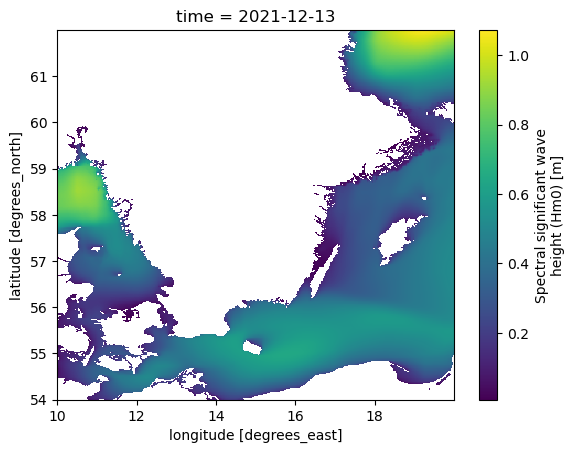

In [16]:
ds.VHM0.sel(time="2021-12-13T12:12.00", method="nearest").plot.imshow()